In [1]:
import pandas as pd
df=pd.read_csv('./data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 연령별 생존율

In [2]:
df['age_cat']=pd.cut(df['Age'],bins=[0,3,7,15,30,60,100],include_lowest=True, labels=['baby','children','teenage','young','adult','old'])
df.groupby('age_cat').mean(numeric_only=True)

C:\Users\baehj\AppData\Local\Temp\ipykernel_1536\2682204086.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_cat').mean(numeric_only=True)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
age_cat,,,,,,,
baby,396.700000,0.666667,2.533333,1.672333,1.733333,1.366667,33.364307
children,466.700000,0.700000,2.650000,4.950000,1.750000,1.350000,27.905830
teenage,442.060606,0.454545,2.696970,11.500000,1.727273,1.121212,35.217430
young,435.058282,0.358896,2.426380,23.262270,0.355828,0.263804,28.015413
adult,470.388693,0.420495,1.954064,41.132509,0.363958,0.392226,42.429225
old,432.545455,0.227273,1.590909,66.022727,0.136364,0.272727,41.371214


In [3]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

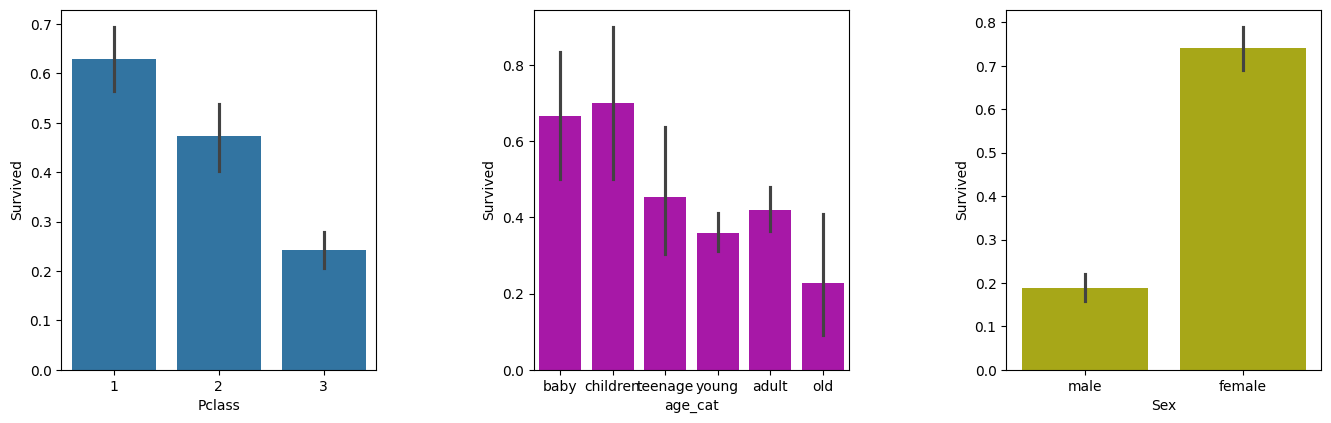

In [4]:

data=df
plt.figure(figsize=[14,4])
plt.subplot(131)
sns.barplot(x='Pclass', y='Survived', data=df)
plt.subplot(1,3,2)
sns.barplot(x='age_cat', y='Survived', data=df, color='m')
plt.subplot(1,3,3)
sns.barplot(x='Sex', y='Survived', data=df, color='y')
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

In [5]:
df.groupby(['Pclass','Sex']).mean(numeric_only=True)

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

# 보트탑승 승객의 생존율 파악하기 / boat 데이터가 없음?

In [ ]:
boat_survivers=df[df['boat'].notnull()]
nboat_survivers=df[df['boat'].isnull()]
print(boat_survivers.groupby('Sex')['Survived'].mean())
print(nboat_survivers.groupby('Sex')['Survived'].mean())

# 귀족계급의 생존율 파악하기

In [12]:
conversion_special=lambda x:x.split(',')[1].split('.')[0].strip()
df['title']=df['Name'].map(conversion_special) # map으로 conversion_special을 반복적용
df['title']=df['title'].replace('Mlle', 'Miss') # mlle도 miss에 포함시킴
df['title']=df['title'].replace('Ms', 'Miss')
df['title']=df['title'].replace('Mme', 'Mrs')
Special=['Lady', 'the Countess', 'Countess', 'Capt', 'Master', 'Col', 
'Don', 'Dr', 'Major','Rev', 'Sir', ' Jonkheer', 'Dona']
for each in Special: # 여러 직위들을 귀족그룹(special)으로 묶음
    df['title'] = df['title'].replace(each, 'Special')
print(df[['title', 'Survived' ]].groupby(['title'], as_index=False).mean())
#as_index=False는 'title'을 인덱스가 아닌 일반 컬럼으로 유지하도록 함

      title  Survived
0  Jonkheer  0.000000
1      Miss  0.702703
2        Mr  0.156673
3       Mrs  0.793651
4   Special  0.500000
